Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [82]:
# https://github.com/osamaghaliah/clustering.git

import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

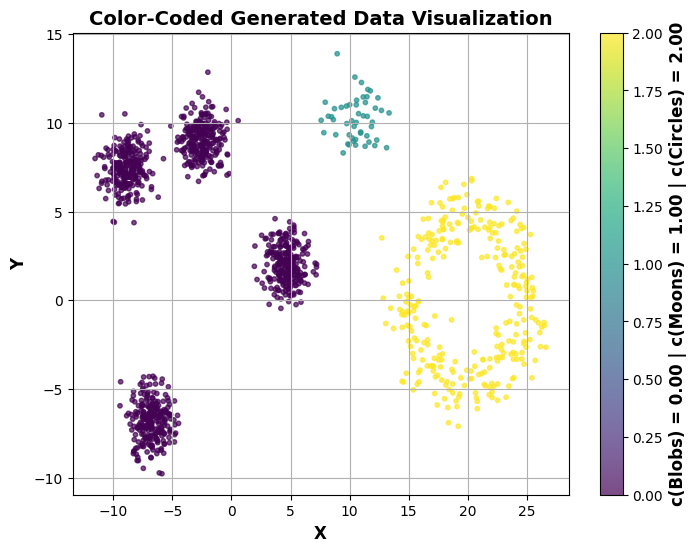

In [77]:
# Generate the dataset using the existing function
X = create_data(1.0, 1000, 50, 300, 200)

# Manually separate the dataset parts based on known sample sizes
n1_samples, n2_samples, n3_samples = 1000, 50, 300

X_1 = X[:n1_samples]               # First n1_samples belong to make_blobs
X_2 = X[n1_samples:n1_samples+n2_samples]  # Next n2_samples belong to make_moons
X_3 = X[n1_samples+n2_samples:]    # Remaining belong to the circular dataset

# Assign different labels for coloring
labels = np.concatenate([
    np.zeros(len(X_1)),   # Cluster data (blobs)
    np.ones(len(X_2)),    # Moon-shaped data
    np.full(len(X_3), 2)  # Circular data
])

# Data visualization:

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)

# Bold title
plt.title("Color-Coded Generated Data Visualization", fontsize=14, fontweight='bold')

# Bold axis labels
plt.xlabel("X", fontsize=12, fontweight='bold')
plt.ylabel("Y", fontsize=12, fontweight='bold')

# Bold colorbar label
cbar = plt.colorbar(scatter)
cbar.set_label("c(Blobs) = 0.00 | c(Moons) = 1.00 | c(Circles) = 2.00", fontsize=12, fontweight='bold')

plt.grid(True)
plt.show()


3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    


Training KMeans with different K values...

K=2: Silhouette Score=0.5673, Inertia=83212.63, Training Time=0.0194 sec
K=3: Silhouette Score=0.5858, Inertia=47215.83, Training Time=0.0190 sec
K=4: Silhouette Score=0.6813, Inertia=19465.56, Training Time=0.0228 sec
K=5: Silhouette Score=0.6976, Inertia=14089.74, Training Time=0.0253 sec
K=6: Silhouette Score=0.7251, Inertia=9835.57, Training Time=0.0333 sec
K=7: Silhouette Score=0.7026, Inertia=6635.59, Training Time=0.0661 sec
K=8: Silhouette Score=0.7160, Inertia=4525.62, Training Time=0.0413 sec
K=9: Silhouette Score=0.7161, Inertia=3701.13, Training Time=0.0447 sec
K=10: Silhouette Score=0.7126, Inertia=3250.03, Training Time=0.0444 sec




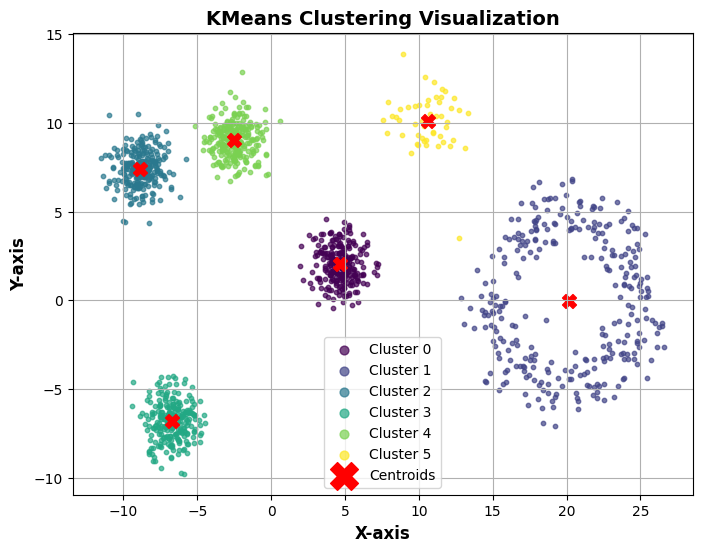

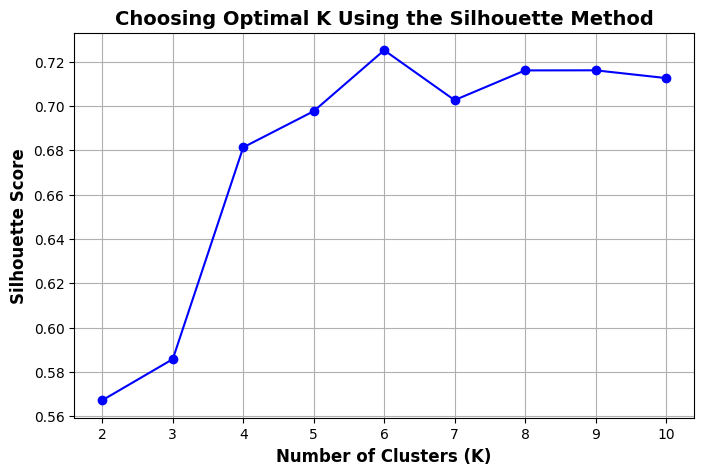


=== Optimal KMeans Clustering Details ===
Optimal number of clusters: 6
Highest Silhouette Score: 0.7251
Inertia at Optimal K: 9835.57
Training Time for Optimal K: 0.0333 sec


In [78]:
# Import required libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import time

# Step 1: Explore Silhouette Scores and Measure Inertia & Training Time
cluster_range = range(2, 11)  # Trying K values from 2 to 10
silhouette_scores = []
inertia_values = []
training_times = []

best_silhouette = -1
optimal_k = None
final_labels = None

print("\nTraining KMeans with different K values...\n")

for k in cluster_range:
    start_time = time.time()
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    end_time = time.time()

    labels = kmeans.labels_
    inertia = kmeans.inertia_  # Sum of squared distances to centroids
    score = silhouette_score(X, labels)

    silhouette_scores.append(score)
    inertia_values.append(inertia)
    training_times.append(end_time - start_time)

    print(f"K={k}: Silhouette Score={score:.4f}, Inertia={inertia:.2f}, Training Time={end_time - start_time:.4f} sec")

    if score > best_silhouette:
        best_silhouette = score
        optimal_k = k
        final_labels = labels  # Save labels for final clustering

# Train KMeans with the optimal number of clusters
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_labels = final_kmeans.fit_predict(X)

# ✅ First: Clustering Visualization
plt.figure(figsize=(8, 6))
unique_labels = set(final_labels)

# Assign colors to each cluster
colors = [plt.cm.viridis(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    plt.scatter(
        X[final_labels == label, 0], X[final_labels == label, 1],
        c=[color], s=10, alpha=0.7, label=f"Cluster {label}"
    )

# Plot centroids
centroids = final_kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", marker="X", s=100, label="Centroids")
print('\n')
plt.title("KMeans Clustering Visualization", fontsize=14, fontweight='bold')
plt.xlabel("X-axis", fontsize=12, fontweight='bold')
plt.ylabel("Y-axis", fontsize=12, fontweight='bold')
plt.legend(loc="best", markerscale=2, fontsize=10)
plt.grid(True)
plt.show()  # ✅ Ensures the clustering visualization appears first

print('\n')
# ✅ Second: Silhouette Score Visualization
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title("Choosing Optimal K Using the Silhouette Method", fontsize=14, fontweight='bold')
plt.xlabel("Number of Clusters (K)", fontsize=12, fontweight='bold')
plt.ylabel("Silhouette Score", fontsize=12, fontweight='bold')
plt.grid(True)
plt.show()

# ✅ Third: Print Best K and Training Summary
print("\n=== Optimal KMeans Clustering Details ===")
print(f"Optimal number of clusters: {optimal_k}")
print(f"Highest Silhouette Score: {best_silhouette:.4f}")
print(f"Inertia at Optimal K: {inertia_values[np.argmax(silhouette_scores)]:.2f}")
print(f"Training Time for Optimal K: {training_times[np.argmax(silhouette_scores)]:.4f} sec")

best_silhouette_kmeans = best_silhouette
inertia_kmeans = inertia_values[np.argmax(silhouette_scores)]
training_time_kmeans = training_times[np.argmax(silhouette_scores)]
optimal_k_kmeans = optimal_k

4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  


Training Agglomerative Clustering with different K values...

K=2: Silhouette Score=0.5698, Inertia=86589.58, Training Time=0.0339 sec
K=3: Silhouette Score=0.5806, Inertia=47923.96, Training Time=0.0562 sec
K=4: Silhouette Score=0.6813, Inertia=19483.46, Training Time=0.0664 sec
K=5: Silhouette Score=0.6978, Inertia=14107.64, Training Time=0.0536 sec
K=6: Silhouette Score=0.7257, Inertia=9854.77, Training Time=0.0593 sec
K=7: Silhouette Score=0.7015, Inertia=6705.23, Training Time=0.0593 sec
K=8: Silhouette Score=0.7086, Inertia=4819.96, Training Time=0.0641 sec
K=9: Silhouette Score=0.7088, Inertia=3821.04, Training Time=0.0557 sec
K=10: Silhouette Score=0.7088, Inertia=3354.75, Training Time=0.0575 sec




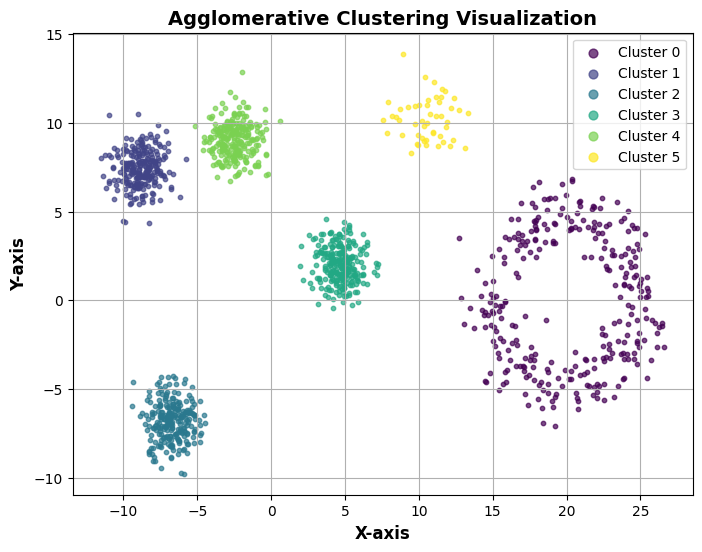

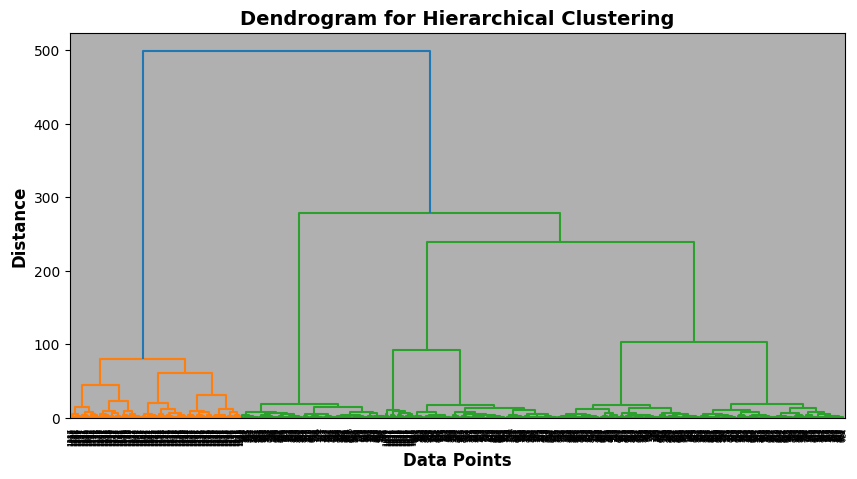

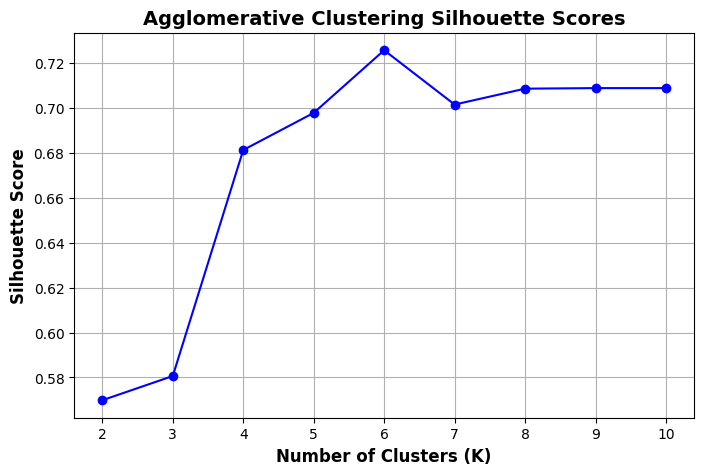


=== Optimal Clustering Details ===
Optimal number of clusters: 6
Highest Silhouette Score: 0.7257
Inertia at Optimal K: 9854.77
Training Time for Optimal K: 0.0593 sec


In [79]:
# Import required libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import time

# Step 1: Explore Silhouette Scores and Measure Inertia & Training Time
cluster_range = range(2, 11)  # Trying 2 to 10 clusters
silhouette_scores = []
inertia_values = []
training_times = []

best_silhouette = -1
optimal_k = None
final_labels = None

print("\nTraining Agglomerative Clustering with different K values...\n")

# Train Agglomerative Clustering with different K values
for k in cluster_range:
    start_time = time.time()
    agglomerative = AgglomerativeClustering(n_clusters=k, linkage="ward")
    cluster_labels = agglomerative.fit_predict(X)
    end_time = time.time()

    # Compute inertia (Sum of squared distances to cluster centroids)
    inertia = 0
    for cluster_id in range(k):
        cluster_points = X[cluster_labels == cluster_id]  # Get points in the cluster
        centroid = np.mean(cluster_points, axis=0)  # Compute centroid
        inertia += np.sum((cluster_points - centroid) ** 2)  # Sum of squared distances

    score = silhouette_score(X, cluster_labels)

    silhouette_scores.append(score)
    inertia_values.append(inertia)
    training_times.append(end_time - start_time)

    print(f"K={k}: Silhouette Score={score:.4f}, Inertia={inertia:.2f}, Training Time={end_time - start_time:.4f} sec")

    if score > best_silhouette:
        best_silhouette = score
        optimal_k = k
        final_labels = cluster_labels  # Save labels for final clustering

# Train Agglomerative Clustering with the optimal number of clusters
final_agglomerative = AgglomerativeClustering(n_clusters=optimal_k, linkage="ward")
final_labels = final_agglomerative.fit_predict(X)

# ✅ First: Scatter Plot Visualization of Agglomerative Clusters (Ensuring it appears before dendrogram and text)
plt.figure(figsize=(8, 6))
unique_labels = set(final_labels)

# Assign colors to each cluster
colors = [plt.cm.viridis(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    plt.scatter(
        X[final_labels == label, 0], X[final_labels == label, 1],
        c=[color], s=10, alpha=0.7, label=f"Cluster {label}"
    )

print('\n')
plt.title("Agglomerative Clustering Visualization", fontsize=14, fontweight='bold')
plt.xlabel("X-axis", fontsize=12, fontweight='bold')
plt.ylabel("Y-axis", fontsize=12, fontweight='bold')
plt.legend(loc="best", markerscale=2, fontsize=10)
plt.grid(True)
plt.show()  # ✅ Ensures the visualization appears first!

print('\n')

# ✅ Second: Generate a Dendrogram (Comes after scatter plot)
plt.figure(figsize=(10, 5))
Z = linkage(X, method='ward')  # Hierarchical clustering linkage matrix
dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering", fontsize=14, fontweight='bold')
plt.xlabel("Data Points", fontsize=12, fontweight='bold')
plt.ylabel("Distance", fontsize=12, fontweight='bold')
plt.grid(True)
plt.show()

print('\n')

# ✅ Third: Silhouette Score Visualization
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title("Agglomerative Clustering Silhouette Scores", fontsize=14, fontweight='bold')
plt.xlabel("Number of Clusters (K)", fontsize=12, fontweight='bold')
plt.ylabel("Silhouette Score", fontsize=12, fontweight='bold')
plt.grid(True)
plt.show()

print("\n=== Optimal Clustering Details ===")
print(f"Optimal number of clusters: {optimal_k}")
print(f"Highest Silhouette Score: {best_silhouette:.4f}")
print(f"Inertia at Optimal K: {inertia_values[np.argmax(silhouette_scores)]:.2f}")
print(f"Training Time for Optimal K: {training_times[np.argmax(silhouette_scores)]:.4f} sec")

best_silhouette_agglo = best_silhouette
inertia_agglo = inertia_values[np.argmax(silhouette_scores)]
training_time_agglo = training_times[np.argmax(silhouette_scores)]
optimal_k_agglo = optimal_k

5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


Training DBSCAN with different parameter combinations...

eps=0.50, min_samples=3: Silhouette Score=0.3488, Clusters Found=45, Training Time=0.012365 sec
eps=0.50, min_samples=5: Silhouette Score=0.2887, Clusters Found=23, Training Time=0.016127 sec
eps=0.50, min_samples=7: Silhouette Score=0.3358, Clusters Found=8, Training Time=0.031650 sec
eps=0.50, min_samples=10: Silhouette Score=0.4491, Clusters Found=4, Training Time=0.037517 sec
eps=1.00, min_samples=3: Silhouette Score=0.7135, Clusters Found=6, Training Time=0.029120 sec
eps=1.00, min_samples=5: Silhouette Score=0.7070, Clusters Found=6, Training Time=0.024105 sec
eps=1.00, min_samples=7: Silhouette Score=0.6807, Clusters Found=7, Training Time=0.014233 sec
eps=1.00, min_samples=10: Silhouette Score=0.6190, Clusters Found=9, Training Time=0.022724 sec
eps=1.50, min_samples=3: Silhouette Score=0.6894, Clusters Found=5, Training Time=0.030598 sec
eps=1.50, min_samples=5: Silhouette Score=0.6894, Clusters Found=5, Training Time=0

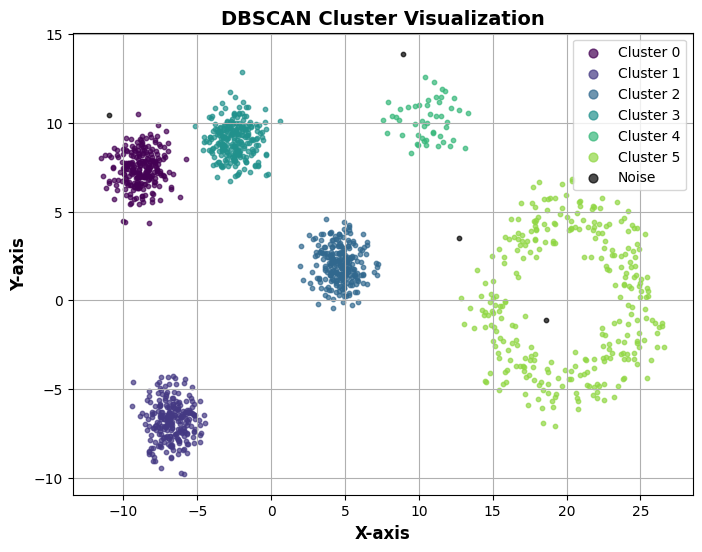

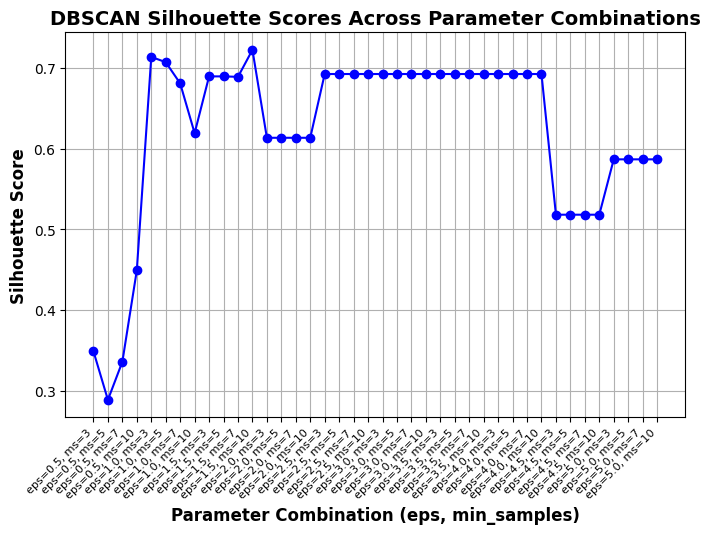


=== Optimal DBSCAN Clustering Details ===
Best eps: 1.50
Best min_samples: 10
Highest Silhouette Score: 0.7223
Number of clusters found (excluding noise): 6
Training Time for Best DBSCAN: 0.017082 sec


In [80]:
# Import required libraries
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import time  # ✅ Import time to measure execution time

# Define parameter ranges for optimization
eps_values = np.linspace(0.5, 5.0, 10)  # Try 10 values for epsilon (radius)
min_samples_values = [3, 5, 7, 10]  # Different min_samples values to test

best_silhouette = -1  # Initialize with worst possible score
best_eps = None
best_min_samples = None
best_labels = None
silhouette_results = []  # Store results for plotting

print("Training DBSCAN with different parameter combinations...\n")

# Train DBSCAN with different parameter combinations (Find the best parameters first)
for eps in eps_values:
    for min_samples in min_samples_values:
        start_time = time.time()  # ✅ Start timing
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        end_time = time.time()  # ✅ End timing

        # Ignore cases where DBSCAN finds only 1 cluster (Silhouette is not defined)
        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
            execution_time = end_time - start_time  # ✅ Calculate training time

            print(f"eps={eps:.2f}, min_samples={min_samples}: Silhouette Score={score:.4f}, Clusters Found={len(set(labels)) - (1 if -1 in labels else 0)}, Training Time={execution_time:.6f} sec")

            # Store silhouette results for visualization
            silhouette_results.append((eps, min_samples, score))

            # Track the best parameters
            if score > best_silhouette:
                best_silhouette = score
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels
                best_training_time = execution_time  # ✅ Store best training time

# Train DBSCAN with the best found parameters
start_time = time.time()  # ✅ Start timing for best DBSCAN model
final_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
final_labels = final_dbscan.fit_predict(X)
end_time = time.time()  # ✅ End timing
training_time_dbscan = end_time - start_time  # ✅ Store final training time

# ✅ First: Visualization of DBSCAN clusters (Ensures it appears before print statements)
plt.figure(figsize=(8, 6))
unique_labels = set(final_labels)

# Assign colors (noise points are black)
colors = [plt.cm.viridis(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points are black
        color = (0, 0, 0, 1)  # Black color for noise

    plt.scatter(
        X[final_labels == label, 0], X[final_labels == label, 1],
        c=[color], s=10, alpha=0.7, label=f"Cluster {label}" if label != -1 else "Noise"
    )

print("\n")

plt.title("DBSCAN Cluster Visualization", fontsize=14, fontweight='bold')
plt.xlabel("X-axis", fontsize=12, fontweight='bold')
plt.ylabel("Y-axis", fontsize=12, fontweight='bold')
plt.legend(loc="best", markerscale=2, fontsize=10)
plt.grid(True)
plt.show()  # ✅ Forces visualization to be displayed first!

# ✅ Second: Silhouette Score Visualization
plt.figure(figsize=(8, 5))

# Extract eps and min_samples pairs with their scores for plotting
eps_min_samples_pairs = [f"eps={eps:.1f}, ms={ms}" for eps, ms, _ in silhouette_results]
silhouette_scores = [score for _, _, score in silhouette_results]

print("\n")

plt.plot(range(len(silhouette_scores)), silhouette_scores, marker='o', linestyle='-', color='b')
plt.xticks(range(len(eps_min_samples_pairs)), eps_min_samples_pairs, rotation=45, ha="right", fontsize=8)
plt.title("DBSCAN Silhouette Scores Across Parameter Combinations", fontsize=14, fontweight='bold')
plt.xlabel("Parameter Combination (eps, min_samples)", fontsize=12, fontweight='bold')
plt.ylabel("Silhouette Score", fontsize=12, fontweight='bold')
plt.grid(True)
plt.show()

# ✅ Finally: Print the best found parameters
print("\n=== Optimal DBSCAN Clustering Details ===")
print(f"Best eps: {best_eps:.2f}")
print(f"Best min_samples: {best_min_samples}")
print(f"Highest Silhouette Score: {best_silhouette:.4f}")
print(f"Number of clusters found (excluding noise): {len(set(best_labels)) - (1 if -1 in best_labels else 0)}")
print(f"Training Time for Best DBSCAN: {training_time_dbscan:.6f} sec")

# ✅ Store variables for final comparison cell
best_silhouette_dbscan = best_silhouette
best_clusters_dbscan = len(set(best_labels)) - (1 if -1 in best_labels else 0)

6. Compare the results and choose the best method for the data


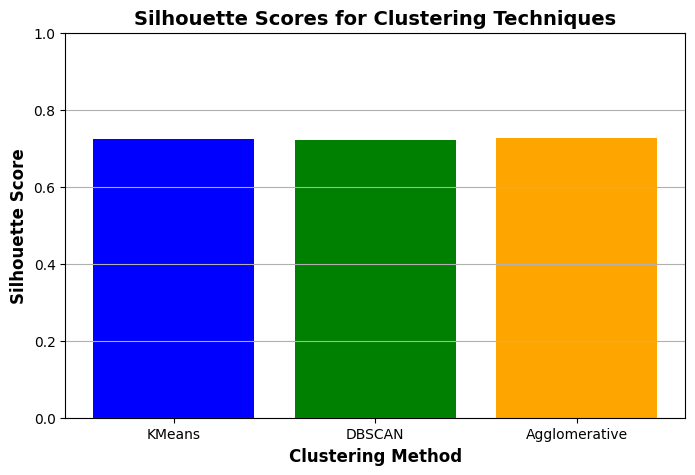


=== Clustering Method Comparison ===

KMeans:
  - Silhouette Score: 0.7251181630059241
  - Inertia: 9835.566667392466
  - Clusters Found: 6

DBSCAN:
  - Silhouette Score: 0.7222593187874933
  - Inertia: N/A (DBSCAN doesn't use Inertia)
  - Clusters Found: 6

Agglomerative:
  - Silhouette Score: 0.7256900714288006
  - Inertia: 9854.767340777536
  - Clusters Found: 6

Best Clustering Method for This Data: Agglomerative 


In [81]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Store results for comparison (excluding Training Time)
clustering_results = {
    "KMeans": {
        "Silhouette Score": best_silhouette_kmeans,
        "Inertia": inertia_kmeans,
        "Clusters Found": optimal_k_kmeans
    },
    "DBSCAN": {
        "Silhouette Score": best_silhouette_dbscan,
        "Inertia": "N/A (DBSCAN doesn't use Inertia)",
        "Clusters Found": best_clusters_dbscan
    },
    "Agglomerative": {
        "Silhouette Score": best_silhouette_agglo,
        "Inertia": inertia_agglo,
        "Clusters Found": optimal_k_agglo
    }
}

# Convert data to structured lists for plotting
methods = list(clustering_results.keys())
silhouette_scores = [clustering_results[m]["Silhouette Score"] for m in methods]

# ✅ Bar Chart - Silhouette Scores for Each Clustering Method
plt.figure(figsize=(8, 5))
plt.bar(methods, silhouette_scores, color=["blue", "green", "orange"])
plt.title("Silhouette Scores for Clustering Techniques", fontsize=14, fontweight='bold')
plt.xlabel("Clustering Method", fontsize=12, fontweight='bold')
plt.ylabel("Silhouette Score", fontsize=12, fontweight='bold')
plt.ylim(0, 1)  # Silhouette scores range between -1 and 1
plt.grid(axis='y')
plt.show()

# ✅ Print Summary of Clustering Performance
print("\n=== Clustering Method Comparison ===")
for method, results in clustering_results.items():
    print(f"\n{method}:")
    for metric, value in results.items():
        print(f"  - {metric}: {value}")

# ✅ Choose the Best Clustering Technique
best_method = max(clustering_results, key=lambda x: clustering_results[x]["Silhouette Score"])
print(f"\nBest Clustering Method for This Data: {best_method} ")